# diases
> 427084000': sinus tachycardia 
> '426761007': supraventricular tachycardia
> '427393009' sinus arrhythmia

In [1]:
!pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 34.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [2]:
!pip install scikit-learn==1.6.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 96.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.6.1 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.


In [3]:
import sklearn 
print(sklearn.__version__)


1.6.1


In [4]:
import pandas as pd
from tqdm import tqdm  # optional: for progress bar

origin_comp_df = pd.read_csv("/kaggle/input/merge-comp-2021-new/ecg-comp-2021-signals-features.csv")

origin_comp_df.iloc[0]

record_name             training/georgia/g8/E07496
Duree_QRS_ms_mean                            168.8
Duree_QRS_ms_std                         17.364075
Duree_QRS_ms_min                             148.0
Duree_QRS_ms_max                             196.0
                                   ...            
std_Intervalle_RR_ms                     70.826862
Age                                           55.0
Sex                                         Female
Dx                                   ['426783006']
Class                                            0
Name: 0, Length: 100, dtype: object

In [5]:
origin_comp_df.columns

Index(['record_name', 'Duree_QRS_ms_mean', 'Duree_QRS_ms_std',
       'Duree_QRS_ms_min', 'Duree_QRS_ms_max', 'Duree_P_ms_mean',
       'Duree_P_ms_std', 'Duree_P_ms_min', 'Duree_P_ms_max', 'Duree_T_ms_mean',
       'Duree_T_ms_std', 'Duree_T_ms_min', 'Duree_T_ms_max',
       'Intervalle_QT_ms_mean', 'Intervalle_QT_ms_std', 'Intervalle_QT_ms_min',
       'Intervalle_QT_ms_max', 'Intervalle_PR_ms_mean', 'Intervalle_PR_ms_std',
       'Intervalle_PR_ms_min', 'Intervalle_PR_ms_max', 'Intervalle_ST_ms_mean',
       'Intervalle_ST_ms_std', 'Intervalle_ST_ms_min', 'Intervalle_ST_ms_max',
       'Amplitude_P_mean', 'Amplitude_P_std', 'Amplitude_P_min',
       'Amplitude_P_max', 'Amplitude_Q_mean', 'Amplitude_Q_std',
       'Amplitude_Q_min', 'Amplitude_Q_max', 'Amplitude_R_mean',
       'Amplitude_R_std', 'Amplitude_R_min', 'Amplitude_R_max',
       'Amplitude_S_mean', 'Amplitude_S_std', 'Amplitude_S_min',
       'Amplitude_S_max', 'Amplitude_T_mean', 'Amplitude_T_std',
       'Amplitude_T_mi

In [6]:
origin_comp_df["Class"].value_counts()

Class
2    40705
0    28967
1    18559
Name: count, dtype: int64

# MIT-BIH norm

In [7]:
origin_mitbih_df = pd.read_csv("/kaggle/input/merge-norm-mitbih-new/norm-mit-signals-features.csv") 

In [8]:
origin_mitbih_df["Class"].value_counts()


Class
0    20233
Name: count, dtype: int64

# ecg arr

In [9]:
origin_ecgarr_df = pd.read_csv("/kaggle/input/ecg-arr-features/ecg-arr-signals-features.csv") 

origin_ecgarr_df["Class"].value_counts()


Class
2    20461
1    16553
0     8125
Name: count, dtype: int64

# challenge 2017


In [10]:
origin_ch2017_df = pd.read_csv("/kaggle/input/merge-challenge-2017-new/challenge-2017-signals-features.csv") 
len(origin_ch2017_df)


8527

In [11]:
origin_ch2017_df['Class'] = origin_ch2017_df['type'].apply(lambda x: 0 if x == 'N' else 2)
origin_ch2017_df = origin_ch2017_df.drop(columns=['type'])

In [12]:
origin_ch2017_df["Class"].value_counts()

Class
0    5075
2    3452
Name: count, dtype: int64

# full data

In [13]:
arr3 = [origin_comp_df,origin_mitbih_df]
#arr3 = [origin_comp_df]

sign_df = pd.concat(arr3, ignore_index=True)

In [14]:
arr4 = [origin_comp_df,origin_mitbih_df,origin_ecgarr_df,origin_ch2017_df]
#arr3 = [origin_comp_df]

sign_df2 = pd.concat(arr4, ignore_index=True)

In [15]:
# check null except age and sex
mask = sign_df2.drop(columns=["Age", "Sex"]).isnull().any(axis=1)
df_with_nulls = sign_df2[mask]
df_with_nulls

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,record_name,Duree_QRS_ms_mean,Duree_QRS_ms_std,Duree_QRS_ms_min,Duree_QRS_ms_max,Duree_P_ms_mean,Duree_P_ms_std,Duree_P_ms_min,Duree_P_ms_max,Duree_T_ms_mean,...,percent_T_inversion,QRS_prolonged_ratio,QT_prolonged_ratio,PVC_ratio,num_beats,std_Intervalle_RR_ms,Age,Sex,Dx,Class
1148,training/georgia/g9/E08644,208.000000,67.882251,160.0,256.0,340.000000,316.783838,116.0,564.0,168.000000,...,0.000000,1.0,1.000000,0.000000,2,NaN,41.0,Male,"['270492004', '426177001']",1
1251,training/georgia/g9/E08747,216.000000,22.627417,200.0,232.0,86.000000,121.622366,0.0,172.0,22.000000,...,-0.500000,1.0,0.000000,0.500000,2,NaN,65.0,Female,"['713426002', '47665007', '164934002', '164890...",2
1293,training/georgia/g9/E08789,216.000000,22.627417,200.0,232.0,86.000000,121.622366,0.0,172.0,22.000000,...,-0.500000,1.0,0.000000,0.500000,2,NaN,65.0,Female,"['713426002', '47665007', '164934002', '164890...",2
1565,training/ningbo/g1/JS10708,508.000000,NaN,508.0,508.0,816.000000,NaN,816.0,816.0,480.000000,...,1.000000,1.0,1.000000,1.000000,1,NaN,89.0,Male,"['111975006', '39732003', '164890007']",2
4977,training/ningbo/g12/JS22121,242.000000,65.053824,196.0,288.0,124.000000,39.597980,96.0,152.0,122.000000,...,1.000000,1.0,0.500000,0.000000,2,NaN,82.0,Male,"['427084000', '75532003', '698252002', '164934...",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162125,A08/A08524,183.000000,26.239591,148.0,260.0,90.875000,121.781335,0.0,472.0,174.375000,...,0.500000,1.0,0.468750,0.000000,32,224.230757,NaN,NaN,NaN,0
162126,A08/A08525,236.666667,28.978265,136.0,296.0,48.476190,62.345707,0.0,224.0,189.047619,...,0.904762,1.0,0.166667,0.119048,42,122.062599,NaN,NaN,NaN,2
162127,A08/A08526,187.047619,34.801845,140.0,252.0,155.238095,59.298258,80.0,368.0,190.761905,...,0.047619,1.0,0.190476,0.000000,42,63.632635,NaN,NaN,NaN,0
162128,A08/A08527,242.956522,63.969075,140.0,428.0,118.869565,74.755485,0.0,248.0,127.304348,...,0.260870,1.0,0.217391,0.021739,46,148.204772,NaN,NaN,NaN,0


In [16]:
sign_df2["Class"].value_counts()

Class
2    64618
0    62400
1    35112
Name: count, dtype: int64

In [17]:
origin_comp_df.iloc[0]

record_name             training/georgia/g8/E07496
Duree_QRS_ms_mean                            168.8
Duree_QRS_ms_std                         17.364075
Duree_QRS_ms_min                             148.0
Duree_QRS_ms_max                             196.0
                                   ...            
std_Intervalle_RR_ms                     70.826862
Age                                           55.0
Sex                                         Female
Dx                                   ['426783006']
Class                                            0
Name: 0, Length: 100, dtype: object

# diases 1 : sinus tachycardia

In [18]:
from collections import Counter
from itertools import chain
import ast
# Assuming df["dx"] contains lists
arr5 = [origin_comp_df,origin_mitbih_df,origin_ecgarr_df]
sign_df3 = pd.concat(arr5, ignore_index=True)

# If "Dx" entries are strings like "[164934002, 427084000]"
parsed_dx_lists = sign_df3["Dx"].apply(ast.literal_eval)

# Flatten and count
code_counts = Counter(chain.from_iterable(parsed_dx_lists))

# Print how many times 164934002 appears
print(code_counts)

Counter({'426783006': 57325, '426177001': 35477, '164934002': 18759, '427084000': 16906, '164890007': 16432, '55827005': 10802, '55930002': 9241, '39732003': 9175, '164889003': 7034, '59931005': 6866, '427393009': 6340, '164865005': 6263, '428750005': 5868, '429622005': 5313, '164873001': 5052, '270492004': 4674, '284470004': 4351, '59118001': 3700, '164951009': 3389, '164917005': 3138, '164930006': 3076, '713427006': 2874, '10370003': 2660, '251146004': 2642, '445118002': 2566, '164861001': 2559, '698252002': 2539, '427172004': 2368, '111975006': 2300, '47665007': 2130, '713426002': 2103, '164884008': 1943, '164909002': 1520, '426761007': 1502, '61721007': 1306, '67741000119109': 1300, '365413008': 1274, '164867002': 1167, '425623009': 1043, '17338001': 952, '6374002': 907, '428417006': 872, '164931005': 804, '425419005': 670, '713422000': 637, '233917008': 567, '54329005': 530, '89792004': 452, '164947007': 444, '106068003': 430, '251223006': 428, '733534002': 426, '426434006': 325, 

In [19]:
sign_df3["Class"].value_counts()


Class
2    61166
0    57325
1    35112
Name: count, dtype: int64

In [20]:
sign_df3_ab = sign_df3[sign_df3["Class"] != 0]
print(len(sign_df3_ab))


96278


In [21]:
sign_df3_ab["Class"] = None

/tmp/ipykernel_13/1236508171.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sign_df3_ab["Class"] = None


In [22]:
sign_df3_ab["Class"].value_counts()


Series([], Name: count, dtype: int64)

In [23]:
sign_df3_ab["Dx"] = sign_df3_ab["Dx"].apply(ast.literal_eval)

# Define a function to classify based on Dx codes
def assign_class(dx_list):
    if "427084000" in dx_list:
        return 0
    else:
        return 1  # Or some default value

# Apply the function to assign the Class column
sign_df3_ab["Class"] = sign_df3_ab["Dx"].apply(assign_class)

/tmp/ipykernel_13/362037583.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sign_df3_ab["Dx"] = sign_df3_ab["Dx"].apply(ast.literal_eval)
/tmp/ipykernel_13/362037583.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sign_df3_ab["Class"] = sign_df3_ab["Dx"].apply(assign_class)


In [24]:
sign_df3_ab["Class"].value_counts()


Class
1    79608
0    16670
Name: count, dtype: int64

## training

In [25]:

df_full = sign_df3_ab
df_full["Class"].value_counts()


Class
1    79608
0    16670
Name: count, dtype: int64

In [26]:

mask = df_full.drop(columns=["Age", "Sex"]).isnull().any(axis=1)
df_with_nulls = df_full[mask]

In [27]:

# Drop those rows from the original dataframe
df_full = df_full[~mask].reset_index(drop=True)

df_full["Class"].value_counts()

Class
1    79558
0    16665
Name: count, dtype: int64

In [28]:

df_balanced = df_full

In [29]:
from sklearn.utils import resample

df = df_full
# Separate the two classes
df_major = df[df['Class'] == 1]
df_minor = df[df['Class'] == 0]

# Downsample the majority class
df_major_downsampled = resample(df_major,
                                replace=False,     # without replacement
                                n_samples=len(df_minor),
                                random_state=42)   # reproducibility

# Combine balanced dataset
df_balanced = pd.concat([df_major_downsampled, df_minor])
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# balancing

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score , confusion_matrix

# Assuming df_full already has the 'is_normal' column for classification
# Define X and y
X = df_balanced.drop(columns=['record_name','Sex','Age',"Dx",'Class'])  # Features: exclude 'is_normal' column

y = df_balanced['Class']  # Target: 'is_normal'
print(y.value_counts())
print(X.columns)
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Class
1    16665
0    16665
Name: count, dtype: int64
Index(['Duree_QRS_ms_mean', 'Duree_QRS_ms_std', 'Duree_QRS_ms_min',
       'Duree_QRS_ms_max', 'Duree_P_ms_mean', 'Duree_P_ms_std',
       'Duree_P_ms_min', 'Duree_P_ms_max', 'Duree_T_ms_mean', 'Duree_T_ms_std',
       'Duree_T_ms_min', 'Duree_T_ms_max', 'Intervalle_QT_ms_mean',
       'Intervalle_QT_ms_std', 'Intervalle_QT_ms_min', 'Intervalle_QT_ms_max',
       'Intervalle_PR_ms_mean', 'Intervalle_PR_ms_std', 'Intervalle_PR_ms_min',
       'Intervalle_PR_ms_max', 'Intervalle_ST_ms_mean', 'Intervalle_ST_ms_std',
       'Intervalle_ST_ms_min', 'Intervalle_ST_ms_max', 'Amplitude_P_mean',
       'Amplitude_P_std', 'Amplitude_P_min', 'Amplitude_P_max',
       'Amplitude_Q_mean', 'Amplitude_Q_std', 'Amplitude_Q_min',
       'Amplitude_Q_max', 'Amplitude_R_mean', 'Amplitude_R_std',
       'Amplitude_R_min', 'Amplitude_R_max', 'Amplitude_S_mean',
       'Amplitude_S_std', 'Amplitude_S_min', 'Amplitude_S_max',
       'Amplitude_T_mean', 'A

In [31]:

# Initialize a RandomForestClassifier
rf_clf =  RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Train the model
rf_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_clf.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9710
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3373
           1       0.98      0.97      0.97      3293

    accuracy                           0.97      6666
   macro avg       0.97      0.97      0.97      6666
weighted avg       0.97      0.97      0.97      6666

[[3293   80]
 [ 113 3180]]


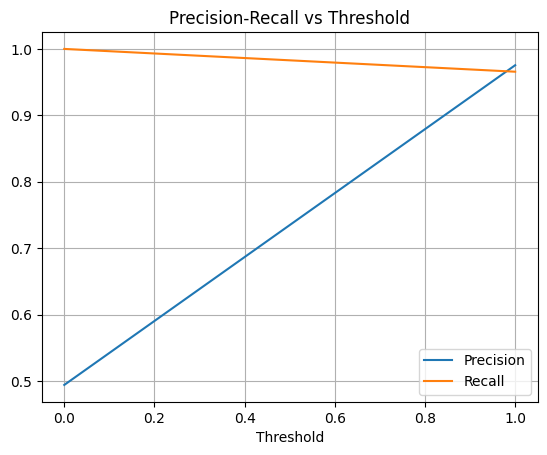

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.legend()
plt.title("Precision-Recall vs Threshold")
plt.grid()
plt.show()


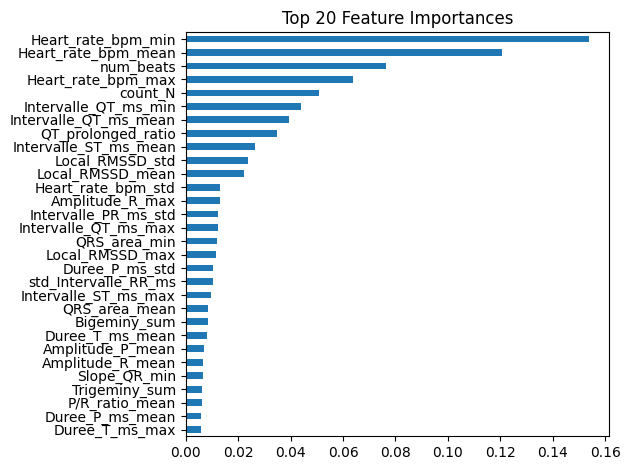

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

importances = rf_clf.feature_importances_
feature_names = X_train.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Top 20 features
feat_imp.head(30).plot(kind='barh', title='Top 20 Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


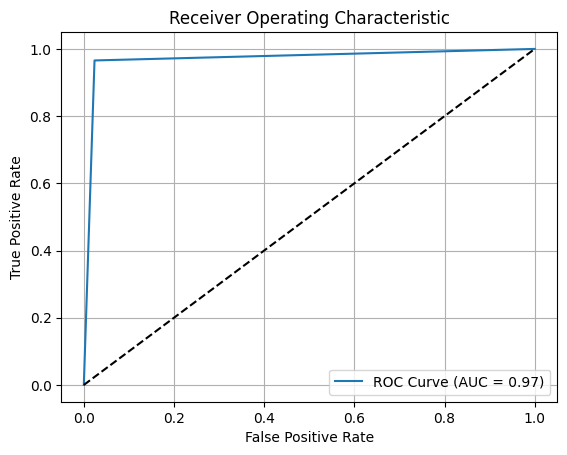

In [34]:
from sklearn.metrics import roc_auc_score, roc_curve

roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.grid()
plt.show()


In [35]:
import joblib

# Save model
joblib.dump(rf_clf, 'sinus_tachycardia_vs_else_model.pkl')
print("Model saved successfully!")

Model saved successfully!


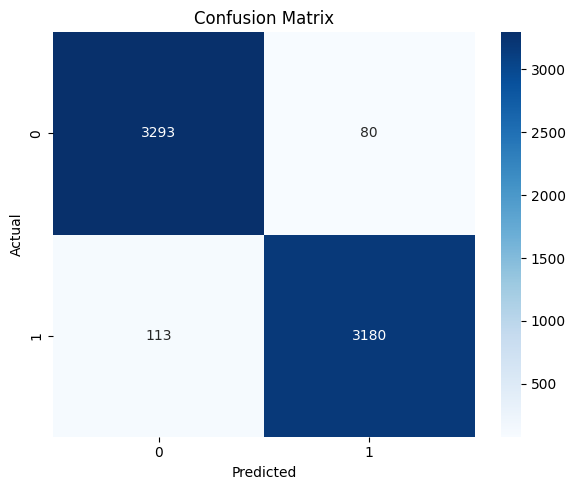

In [36]:


import pandas as pd
import json
from sklearn.metrics import classification_report

# Save predictions
pred_df = pd.DataFrame({'y_true': y_test, 'y_pred': y_pred})
pred_df.to_csv('sinus_tachycardia_predictions.csv', index=False)

# Save metrics
report = classification_report(y_test, y_pred, output_dict=True)
with open("sinus_tachycardia_classification_report.json", "w") as f:
    json.dump(report, f)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("sinus_tachycardia_confusion_matrix.png")



# diases 2: '426761007': supraventricular tachycardia

In [37]:
from collections import Counter
from itertools import chain
import ast
# Assuming df["dx"] contains lists
arr5 = [origin_comp_df,origin_mitbih_df,origin_ecgarr_df]
sign_df3 = pd.concat(arr5, ignore_index=True)

# If "Dx" entries are strings like "[164934002, 427084000]"
parsed_dx_lists = sign_df3["Dx"].apply(ast.literal_eval)

# Flatten and count
code_counts = Counter(chain.from_iterable(parsed_dx_lists))


# Print how many times 164934002 appears
print(code_counts)

Counter({'426783006': 57325, '426177001': 35477, '164934002': 18759, '427084000': 16906, '164890007': 16432, '55827005': 10802, '55930002': 9241, '39732003': 9175, '164889003': 7034, '59931005': 6866, '427393009': 6340, '164865005': 6263, '428750005': 5868, '429622005': 5313, '164873001': 5052, '270492004': 4674, '284470004': 4351, '59118001': 3700, '164951009': 3389, '164917005': 3138, '164930006': 3076, '713427006': 2874, '10370003': 2660, '251146004': 2642, '445118002': 2566, '164861001': 2559, '698252002': 2539, '427172004': 2368, '111975006': 2300, '47665007': 2130, '713426002': 2103, '164884008': 1943, '164909002': 1520, '426761007': 1502, '61721007': 1306, '67741000119109': 1300, '365413008': 1274, '164867002': 1167, '425623009': 1043, '17338001': 952, '6374002': 907, '428417006': 872, '164931005': 804, '425419005': 670, '713422000': 637, '233917008': 567, '54329005': 530, '89792004': 452, '164947007': 444, '106068003': 430, '251223006': 428, '733534002': 426, '426434006': 325, 

In [38]:
sign_df3_ab = sign_df3[sign_df3["Class"] != 0]
print(len(sign_df3_ab))


96278


In [39]:
sign_df3_ab["Class"] = None

/tmp/ipykernel_13/1236508171.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sign_df3_ab["Class"] = None


In [40]:
sign_df3_ab["Dx"] = sign_df3_ab["Dx"].apply(ast.literal_eval)

# Define a function to classify based on Dx codes
def assign_class(dx_list):
    if "426761007" in dx_list:
        return 0
    else:
        return 1  # Or some default value

# Apply the function to assign the Class column
sign_df3_ab["Class"] = sign_df3_ab["Dx"].apply(assign_class)

/tmp/ipykernel_13/1975294185.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sign_df3_ab["Dx"] = sign_df3_ab["Dx"].apply(ast.literal_eval)
/tmp/ipykernel_13/1975294185.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sign_df3_ab["Class"] = sign_df3_ab["Dx"].apply(assign_class)


In [41]:
sign_df3_ab["Class"].value_counts()


Class
1    94779
0     1499
Name: count, dtype: int64

In [42]:

df_full = sign_df3_ab
df_full["Class"].value_counts()


Class
1    94779
0     1499
Name: count, dtype: int64

In [43]:

mask = df_full.drop(columns=["Age", "Sex"]).isnull().any(axis=1)
df_with_nulls = df_full[mask]
# Drop those rows from the original dataframe
df_full = df_full[~mask].reset_index(drop=True)

df_full["Class"].value_counts()
df_balanced = df_full

In [44]:
from sklearn.utils import resample

df = df_full
# Separate the two classes
df_major = df[df['Class'] == 1]
df_minor = df[df['Class'] == 0]

# Downsample the majority class
df_major_downsampled = resample(df_major,
                                replace=False,     # without replacement
                                n_samples=len(df_minor),
                                random_state=42)   # reproducibility

# Combine balanced dataset
df_balanced = pd.concat([df_major_downsampled, df_minor])
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# balancing

In [45]:
df_balanced["Class"].value_counts()

Class
1    1493
0    1493
Name: count, dtype: int64

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score , confusion_matrix

# Assuming df_full already has the 'is_normal' column for classification
# Define X and y
X = df_balanced.drop(columns=['record_name','Sex','Age',"Dx",'Class'])  # Features: exclude 'is_normal' column

y = df_balanced['Class']  # Target: 'is_normal'
print(y.value_counts())
print(X.columns)
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Class
1    1493
0    1493
Name: count, dtype: int64
Index(['Duree_QRS_ms_mean', 'Duree_QRS_ms_std', 'Duree_QRS_ms_min',
       'Duree_QRS_ms_max', 'Duree_P_ms_mean', 'Duree_P_ms_std',
       'Duree_P_ms_min', 'Duree_P_ms_max', 'Duree_T_ms_mean', 'Duree_T_ms_std',
       'Duree_T_ms_min', 'Duree_T_ms_max', 'Intervalle_QT_ms_mean',
       'Intervalle_QT_ms_std', 'Intervalle_QT_ms_min', 'Intervalle_QT_ms_max',
       'Intervalle_PR_ms_mean', 'Intervalle_PR_ms_std', 'Intervalle_PR_ms_min',
       'Intervalle_PR_ms_max', 'Intervalle_ST_ms_mean', 'Intervalle_ST_ms_std',
       'Intervalle_ST_ms_min', 'Intervalle_ST_ms_max', 'Amplitude_P_mean',
       'Amplitude_P_std', 'Amplitude_P_min', 'Amplitude_P_max',
       'Amplitude_Q_mean', 'Amplitude_Q_std', 'Amplitude_Q_min',
       'Amplitude_Q_max', 'Amplitude_R_mean', 'Amplitude_R_std',
       'Amplitude_R_min', 'Amplitude_R_max', 'Amplitude_S_mean',
       'Amplitude_S_std', 'Amplitude_S_min', 'Amplitude_S_max',
       'Amplitude_T_mean', 'Amp

In [47]:

# Initialize a RandomForestClassifier
rf_clf =  RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Train the model
rf_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_clf.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9548
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       295
           1       0.98      0.93      0.95       303

    accuracy                           0.95       598
   macro avg       0.96      0.96      0.95       598
weighted avg       0.96      0.95      0.95       598

[[289   6]
 [ 21 282]]


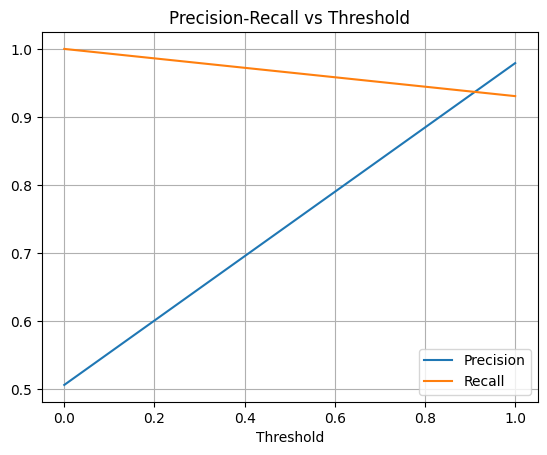

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.legend()
plt.title("Precision-Recall vs Threshold")
plt.grid()
plt.show()


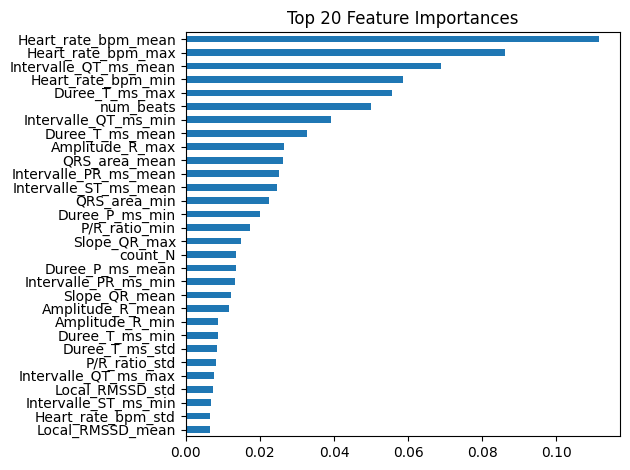

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

importances = rf_clf.feature_importances_
feature_names = X_train.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Top 20 features
feat_imp.head(30).plot(kind='barh', title='Top 20 Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [50]:
import joblib

# Save model
joblib.dump(rf_clf, 'supraventricular_tachycardia_vs_else_model.pkl')
print("Model saved successfully!")

Model saved successfully!


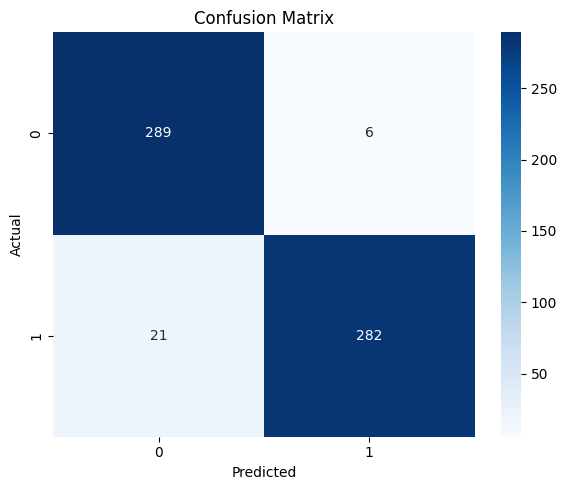

In [51]:
import pandas as pd
import json
from sklearn.metrics import classification_report

# Save predictions
pred_df = pd.DataFrame({'y_true': y_test, 'y_pred': y_pred})
pred_df.to_csv('supraventricular_tachycardia_predictions.csv', index=False)

# Save metrics
report = classification_report(y_test, y_pred, output_dict=True)
with open("supraventricular_tachycardia_classification_report.json", "w") as f:
    json.dump(report, f)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("supraventricular_tachycardia_confusion_matrix.png")

# diases 3: '427393009' sinus arrhythmia

In [52]:
from collections import Counter
from itertools import chain
import ast
# Assuming df["dx"] contains lists
arr5 = [origin_comp_df,origin_mitbih_df,origin_ecgarr_df]
sign_df3 = pd.concat(arr5, ignore_index=True)

# If "Dx" entries are strings like "[164934002, 427084000]"
parsed_dx_lists = sign_df3["Dx"].apply(ast.literal_eval)

# Flatten and count
code_counts = Counter(chain.from_iterable(parsed_dx_lists))

# Print how many times 164934002 appears
print(code_counts)

Counter({'426783006': 57325, '426177001': 35477, '164934002': 18759, '427084000': 16906, '164890007': 16432, '55827005': 10802, '55930002': 9241, '39732003': 9175, '164889003': 7034, '59931005': 6866, '427393009': 6340, '164865005': 6263, '428750005': 5868, '429622005': 5313, '164873001': 5052, '270492004': 4674, '284470004': 4351, '59118001': 3700, '164951009': 3389, '164917005': 3138, '164930006': 3076, '713427006': 2874, '10370003': 2660, '251146004': 2642, '445118002': 2566, '164861001': 2559, '698252002': 2539, '427172004': 2368, '111975006': 2300, '47665007': 2130, '713426002': 2103, '164884008': 1943, '164909002': 1520, '426761007': 1502, '61721007': 1306, '67741000119109': 1300, '365413008': 1274, '164867002': 1167, '425623009': 1043, '17338001': 952, '6374002': 907, '428417006': 872, '164931005': 804, '425419005': 670, '713422000': 637, '233917008': 567, '54329005': 530, '89792004': 452, '164947007': 444, '106068003': 430, '251223006': 428, '733534002': 426, '426434006': 325, 

In [53]:
sign_df3_ab = sign_df3[sign_df3["Class"] != 0]
sign_df3_ab["Class"] = None

/tmp/ipykernel_13/2997288717.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sign_df3_ab["Class"] = None


In [54]:
sign_df3_ab["Dx"] = sign_df3_ab["Dx"].apply(ast.literal_eval)

# Define a function to classify based on Dx codes
def assign_class(dx_list):
    if "427393009" in dx_list:
        return 0
    else:
        return 1  # Or some default value

# Apply the function to assign the Class column
sign_df3_ab["Class"] = sign_df3_ab["Dx"].apply(assign_class)

/tmp/ipykernel_13/2230923197.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sign_df3_ab["Dx"] = sign_df3_ab["Dx"].apply(ast.literal_eval)
/tmp/ipykernel_13/2230923197.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sign_df3_ab["Class"] = sign_df3_ab["Dx"].apply(assign_class)


In [55]:

df_full = sign_df3_ab
df_full["Class"].value_counts()

Class
1    90782
0     5496
Name: count, dtype: int64

In [56]:

mask = df_full.drop(columns=["Age", "Sex"]).isnull().any(axis=1)
df_with_nulls = df_full[mask]
# Drop those rows from the original dataframe
df_full = df_full[~mask].reset_index(drop=True)

df_full["Class"].value_counts()
df_balanced = df_full

In [57]:
from sklearn.utils import resample

df = df_full
# Separate the two classes
df_major = df[df['Class'] == 1]
df_minor = df[df['Class'] == 0]

# Downsample the majority class
df_major_downsampled = resample(df_major,
                                replace=False,     # without replacement
                                n_samples=len(df_minor),
                                random_state=42)   # reproducibility

# Combine balanced dataset
df_balanced = pd.concat([df_major_downsampled, df_minor])
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# balancing

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score , confusion_matrix

# Assuming df_full already has the 'is_normal' column for classification
# Define X and y
X = df_balanced.drop(columns=['record_name','Sex','Age',"Dx",'Class'])  # Features: exclude 'is_normal' column

y = df_balanced['Class']  # Target: 'is_normal'
print(y.value_counts())
print(X.columns)
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Class
1    5496
0    5496
Name: count, dtype: int64
Index(['Duree_QRS_ms_mean', 'Duree_QRS_ms_std', 'Duree_QRS_ms_min',
       'Duree_QRS_ms_max', 'Duree_P_ms_mean', 'Duree_P_ms_std',
       'Duree_P_ms_min', 'Duree_P_ms_max', 'Duree_T_ms_mean', 'Duree_T_ms_std',
       'Duree_T_ms_min', 'Duree_T_ms_max', 'Intervalle_QT_ms_mean',
       'Intervalle_QT_ms_std', 'Intervalle_QT_ms_min', 'Intervalle_QT_ms_max',
       'Intervalle_PR_ms_mean', 'Intervalle_PR_ms_std', 'Intervalle_PR_ms_min',
       'Intervalle_PR_ms_max', 'Intervalle_ST_ms_mean', 'Intervalle_ST_ms_std',
       'Intervalle_ST_ms_min', 'Intervalle_ST_ms_max', 'Amplitude_P_mean',
       'Amplitude_P_std', 'Amplitude_P_min', 'Amplitude_P_max',
       'Amplitude_Q_mean', 'Amplitude_Q_std', 'Amplitude_Q_min',
       'Amplitude_Q_max', 'Amplitude_R_mean', 'Amplitude_R_std',
       'Amplitude_R_min', 'Amplitude_R_max', 'Amplitude_S_mean',
       'Amplitude_S_std', 'Amplitude_S_min', 'Amplitude_S_max',
       'Amplitude_T_mean', 'Amp

In [59]:

# Initialize a RandomForestClassifier
rf_clf =  RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Train the model
rf_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_clf.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9350
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1109
           1       0.95      0.92      0.93      1090

    accuracy                           0.93      2199
   macro avg       0.94      0.93      0.93      2199
weighted avg       0.94      0.93      0.93      2199

[[1055   54]
 [  89 1001]]


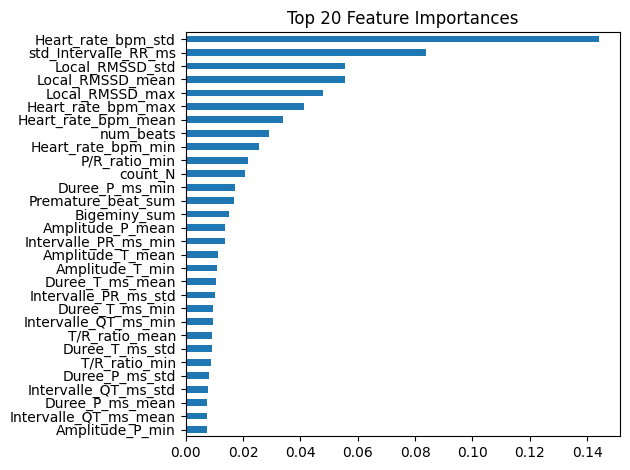

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

importances = rf_clf.feature_importances_
feature_names = X_train.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Top 20 features
feat_imp.head(30).plot(kind='barh', title='Top 20 Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [61]:
import joblib

# Save model
joblib.dump(rf_clf, 'sinus arrhythmia_vs_else_model.pkl')
print("Model saved successfully!")

Model saved successfully!


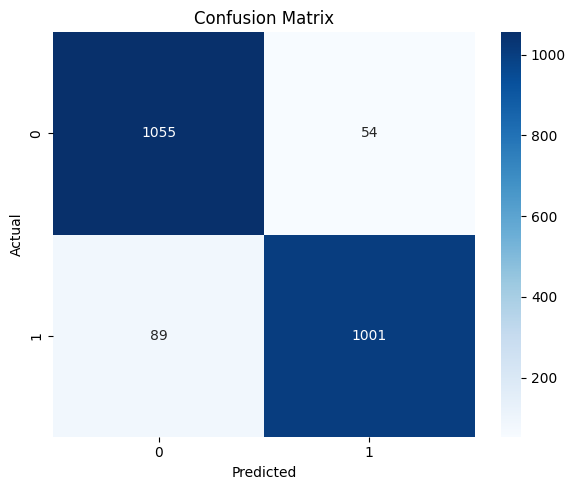

In [62]:
import pandas as pd
import json
from sklearn.metrics import classification_report

# Save predictions
pred_df = pd.DataFrame({'y_true': y_test, 'y_pred': y_pred})
pred_df.to_csv('sinus_arrhythmia_predictions.csv', index=False)

# Save metrics
report = classification_report(y_test, y_pred, output_dict=True)
with open("sinus_arrhythmia_classification_report.json", "w") as f:
    json.dump(report, f)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("sinus_arrhythmia_confusion_matrix.png")